In [1]:
#import the important libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Task 1: Exploratory Data Analysis (EDA):

In [2]:
#load the dataset 
data = pd.read_csv('./wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#duplicate the data set to perform different operations 
df = data.copy()

In [4]:
# summarizes the central tendency, dispersion, and shape of the dataset’s distribution,
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
# get the information about the data types of features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Null Values

In [6]:
df.isnull().sum()
# There is no null present in our dataset 

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

## Histogram 

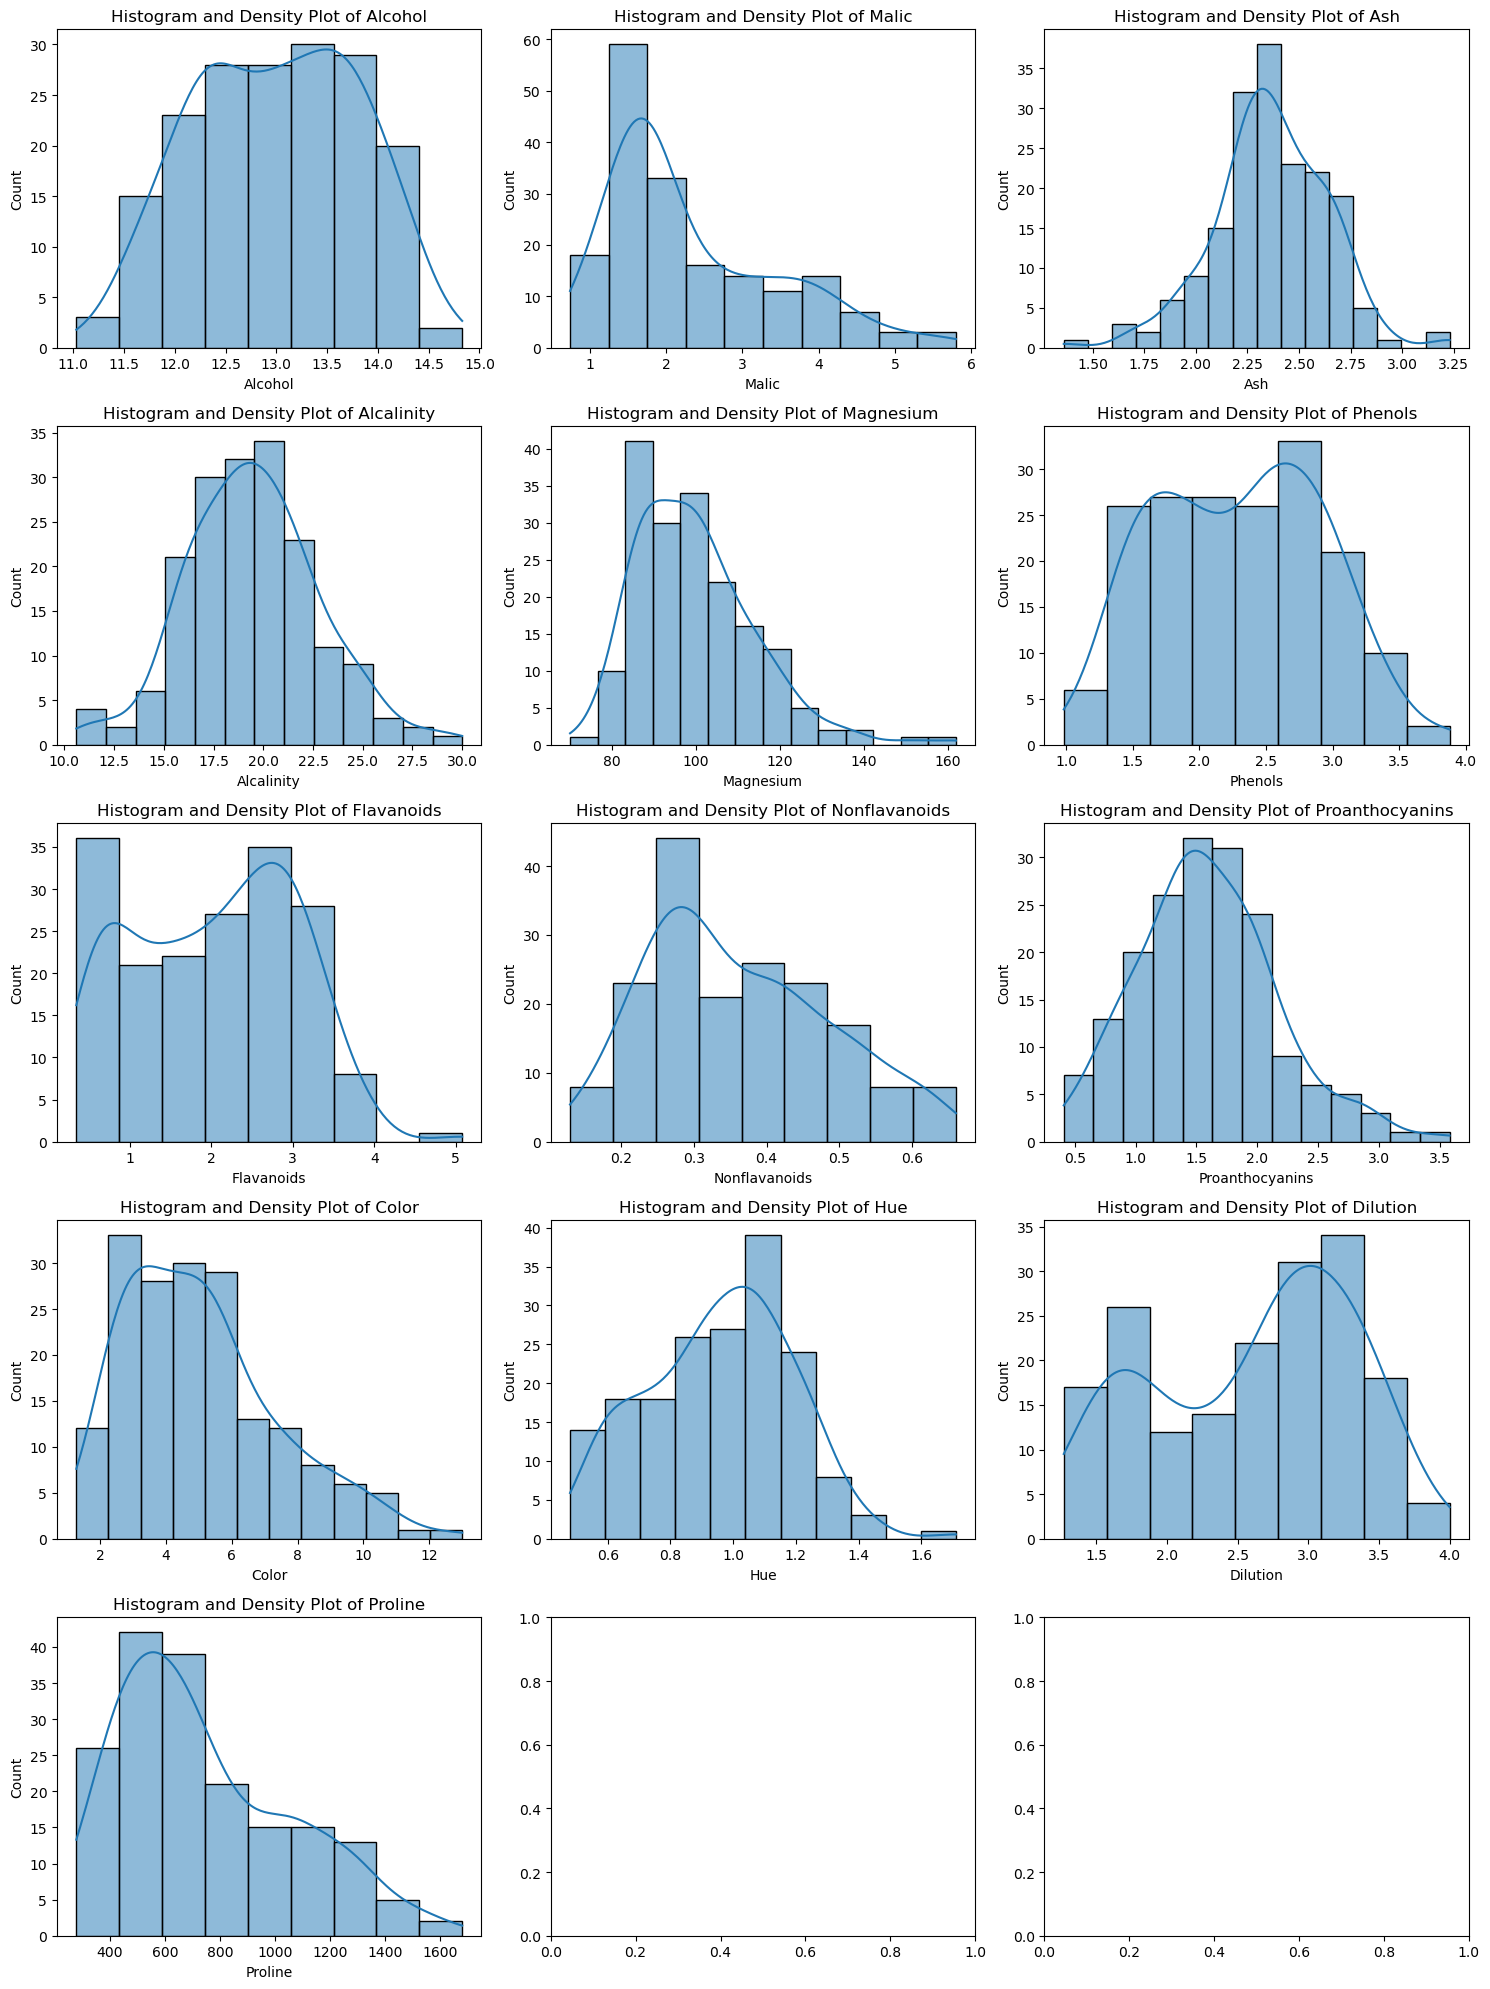

In [7]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# List of columns to plot
columns = df.columns[1:]  # Exclude 'Type' column

# Plot histograms, box plots, and density plots
for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histogram and Density Plot of {col}')

plt.tight_layout()
plt.show()

* Most features exhibit a right-skewed distribution, indicating that higher values are less frequent.
* Features like 'Alcohol', 'Phenols', and 'Flavanoids' show a more normal distribution.

## Box Plot  

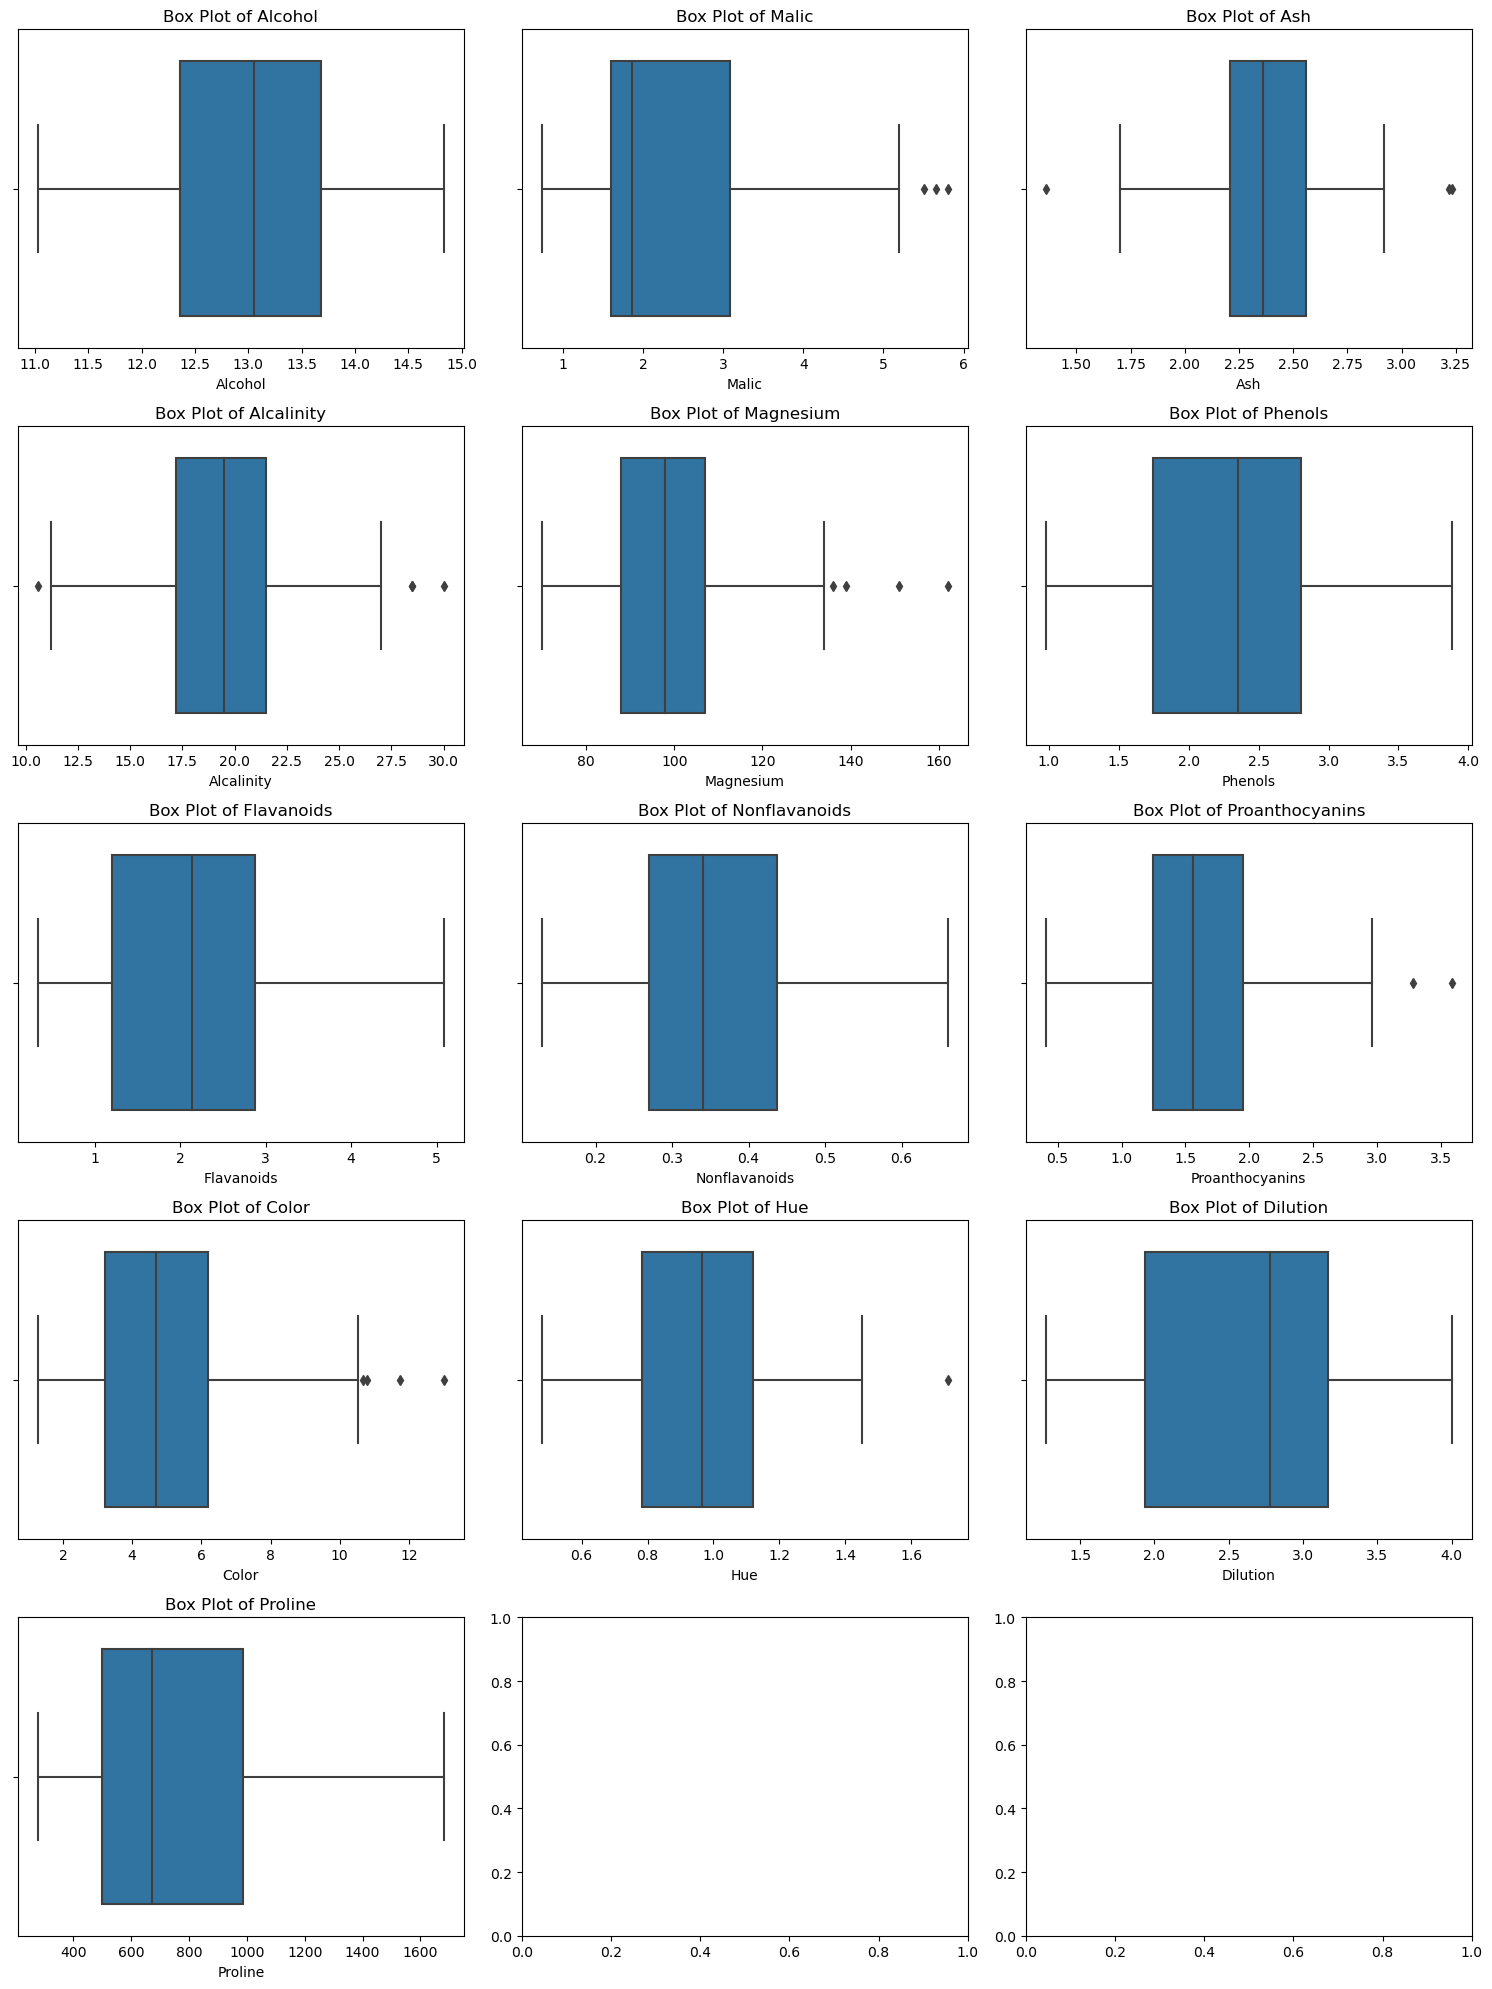

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns):
    sns.boxplot(x=data[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

* Several features have outliers, particularly 'Malic', 'Alcalinity', 'Magnesium', and 'Proline'.
* The spread of the data varies significantly across features, with 'Proline' showing a wide range.

## IQR Method for outliers 

In [9]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each column except 'Type'
for col in df.columns[1:]:
    df = remove_outliers(df, col)

# Display the first few rows of the cleaned dataset
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


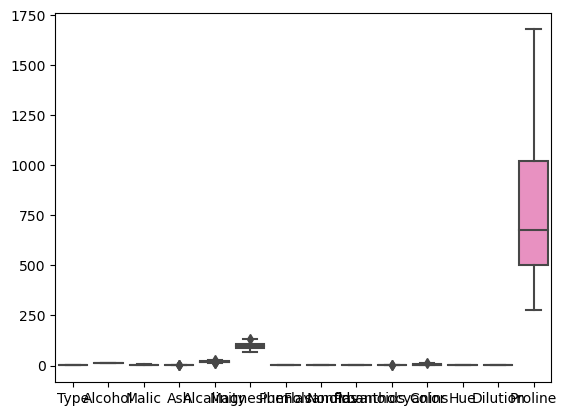

In [10]:
sns.boxplot(df)
plt.show()

## HeatMap Correlation Matrix

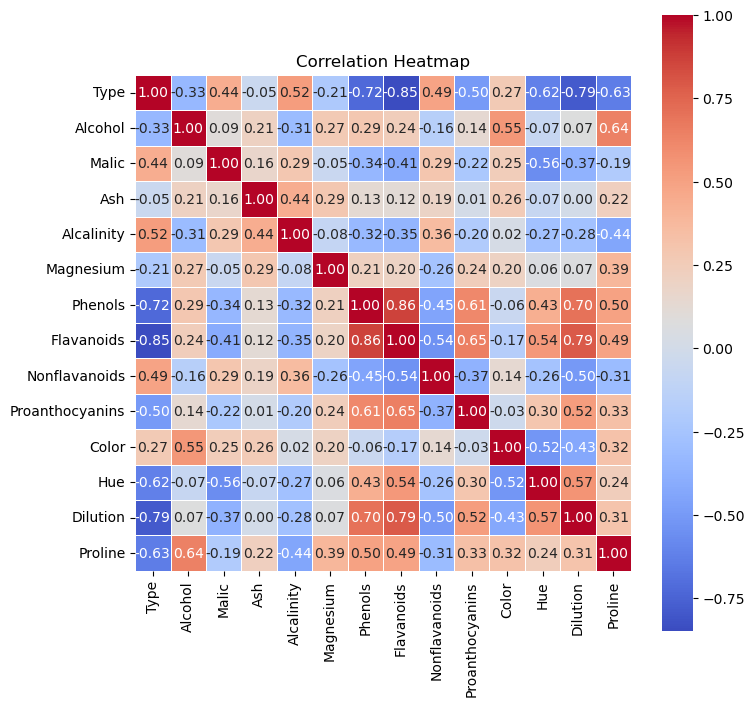

In [11]:
# Calculate the correlation matrix
corr_matrix = data.corr()
# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



##### Strong Positive Correlations:
 * **Flavanoids and Phenols (0.86)**:These features are highly correlated, indicating that wines with higher flavonoid content also tend to have higher phenol content.

* **Alcohol and Proline(0.64)**:Higher alcohol content is associated with higher proline levels.

* **Flavanoids and Dilution(0.79)**: Wines with higher color Flavanoids also tend to have higher dilution values.

##### Negative Correlations:
* **Flavanoids and Nonflavanoids(-0.54)**: An inverse relationship suggests that as flavonoid content increases, nonflavonoid content tends to decrease.

## Pair Plot

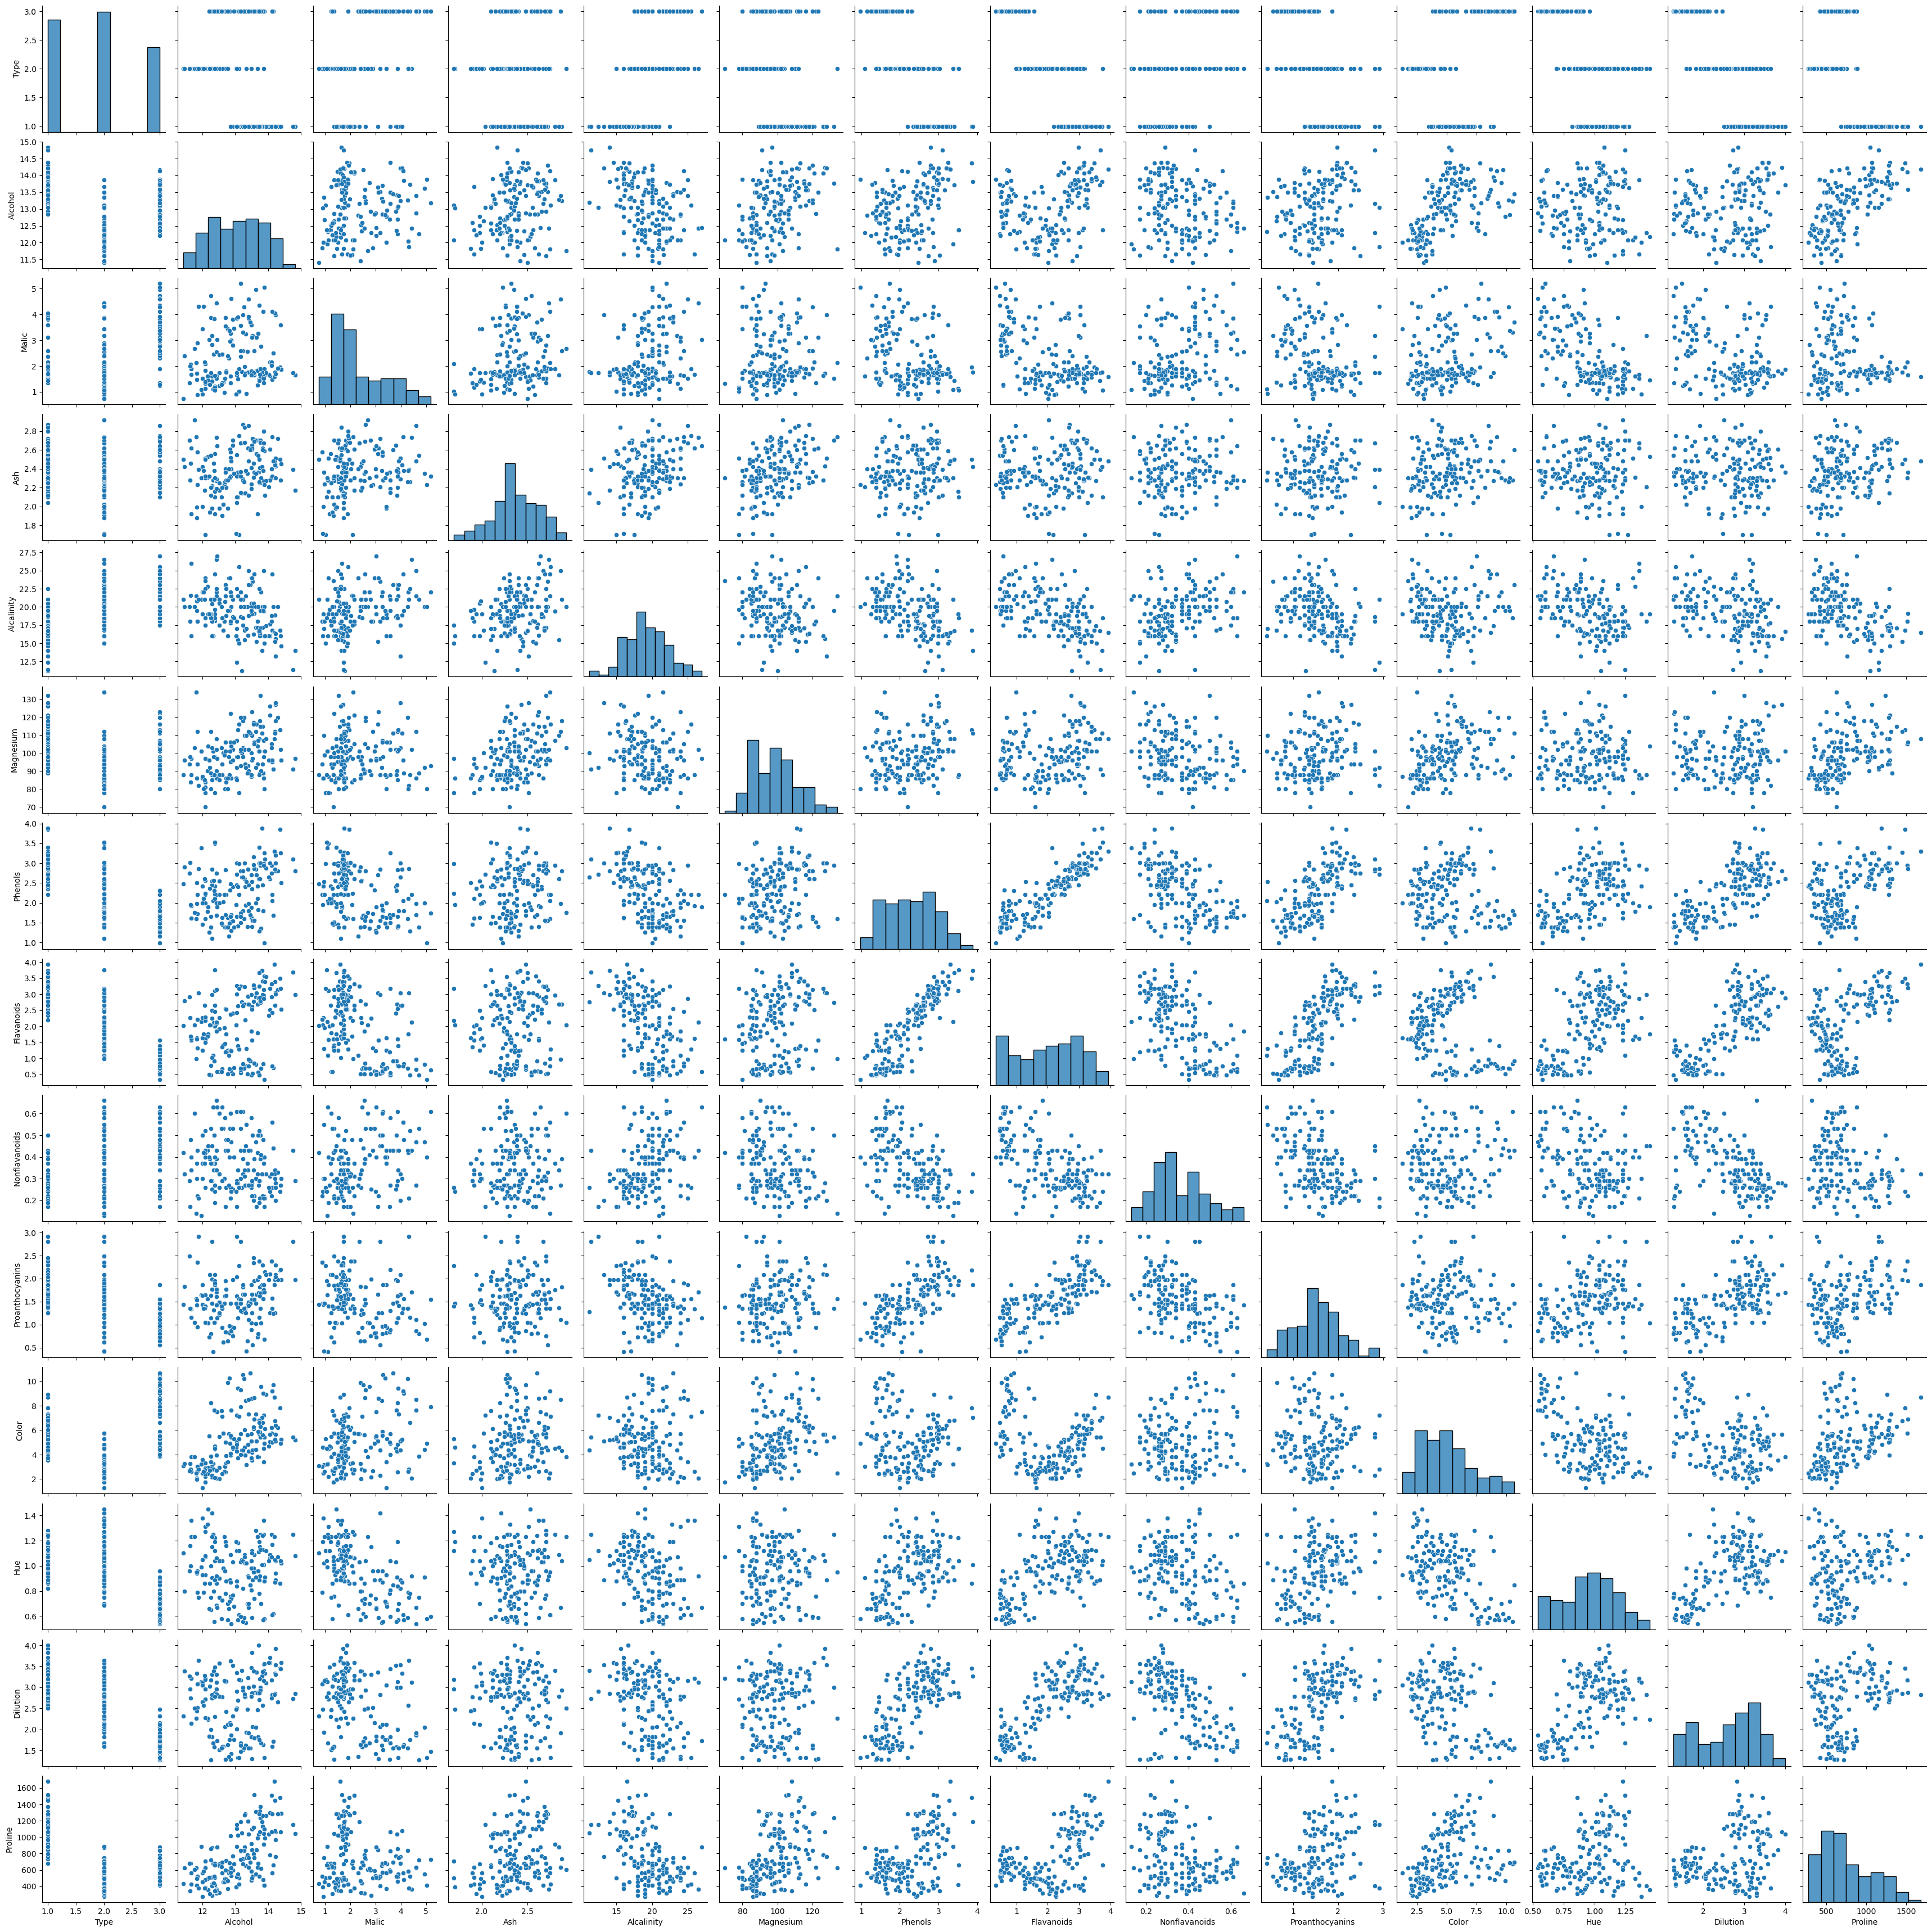

In [12]:
sns.pairplot(df)
plt.show()

The pair plots show distinct clustering patterns for different wine types, especially in features like 'Alcohol', 'Flavanoids', and 'Proline', indicating that these features can be useful for classification.

# Task 2: Dimensionality Reduction with PCA:

### Standardization

In [13]:
#import standardScaler library
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

### PCA

In [15]:
# import PCA from sklearn decompositon 
from sklearn.decomposition import PCA

In [16]:
pca=PCA()
pca_components=pca.fit_transform(df_scaled)

In [17]:
#The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.41905348, 0.19184699, 0.0884676 , 0.06537724, 0.05355344,
       0.04192626, 0.03292775, 0.02469829, 0.02246565, 0.01963658,
       0.01666419, 0.01234736, 0.00797976, 0.00305541])

In [18]:
# Cumulative variance
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 41.91,  61.09,  69.94,  76.48,  81.84,  86.03,  89.32,  91.79,
        94.04,  96.  ,  97.67,  98.9 ,  99.7 , 100.01])

**above cumulative explained variance in percentages the threshould cariance is around  85-90%, so choosing either 6 or 7 components would be optimal.**

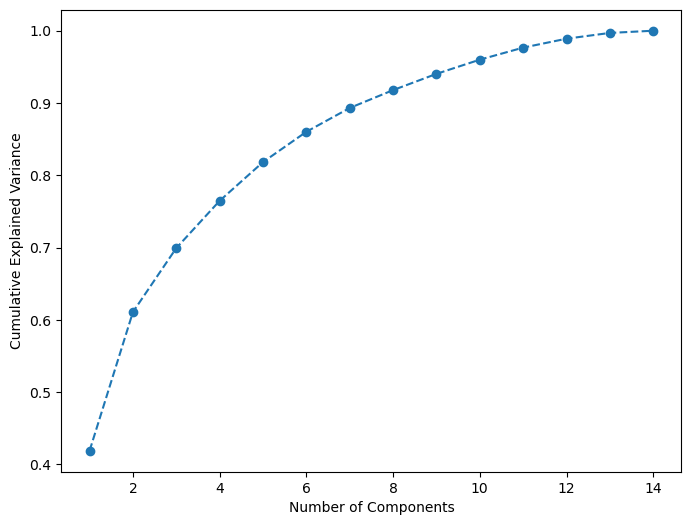

In [19]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


**Above scree plot suggests that selecting 6-7 components would be a reasonable choice, as it captures a substantial amount of variance (around 85-90%) while reducing the dimensionality.**

#### PCA for 6 Components

In [20]:
pca = PCA(n_components=6)  
df_pca = pca.fit_transform(df_scaled)

# Task 3: Clustering with Original Data: Orignal Dataset 

### K-means Clustering Algorithm

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans_labels = kmeans.fit_predict(df_scaled)

In [23]:
# Evaluate clustering performance
sil_score = silhouette_score(df_scaled, kmeans_labels)
db_score = davies_bouldin_score(df_scaled, kmeans_labels)

print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {db_score}')

Silhouette Score: 0.32284880276865435
Davies-Bouldin Score: 1.239771206950418


* The Silhouette Score shows  moderate clustering quality, suggesting potential overlap between clusters.
* The Davies-Bouldin Score show that clusters are not very distinct, implying that the clustering could be improved.

### Scatter plot

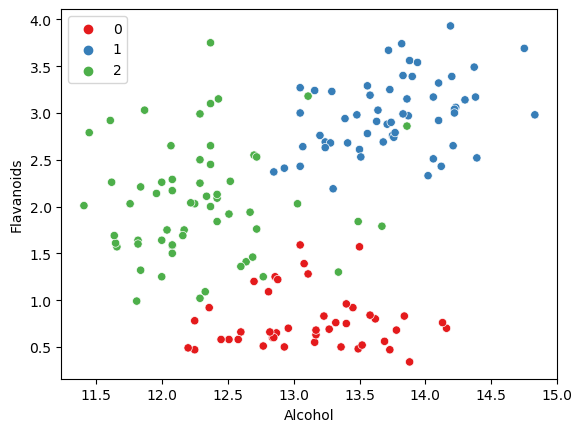

In [24]:
### scatter plot to see the cluster 
sns.scatterplot(x=df['Alcohol'], y=df['Flavanoids'], hue=kmeans_labels, palette='Set1') 
plt.show()

These metrics suggest a moderate clustering performance, indicating that while the clusters are somewhat distinct

## Hierarchical clustering on origanl data

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [52]:
linked = linkage(df_scaled, method='ward')


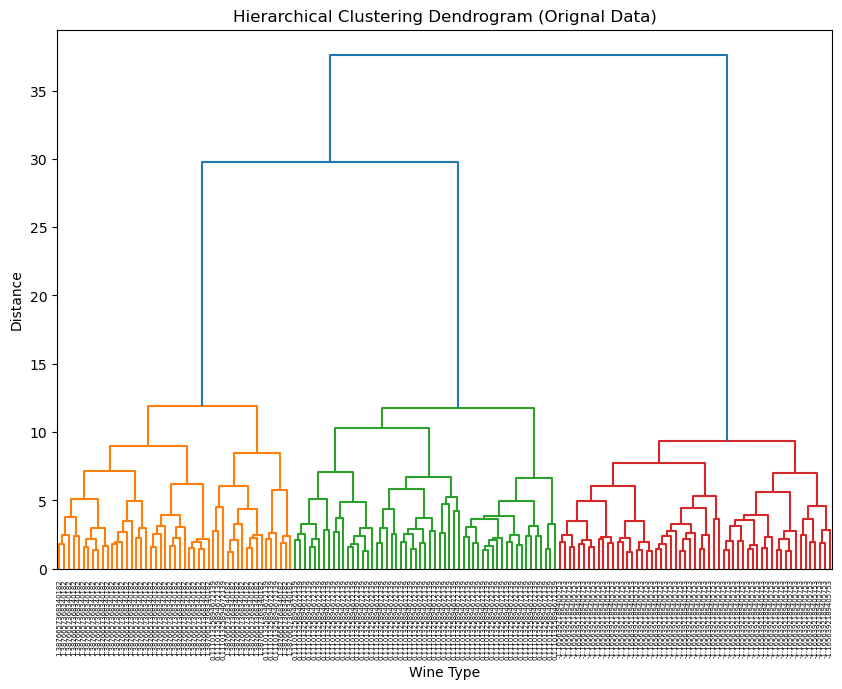

In [53]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df_scaled['Type'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Orignal Data)')
plt.xlabel('Wine Type')
plt.ylabel('Distance')
plt.show()

By analylizing dentrogram we can see that there are three cluster are formed 

In [54]:
# Perform Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_hierarchical = agg_clust.fit_predict(df_scaled)

In [55]:
# Evaluate clustering performance
sil_score_hierarchical = silhouette_score(df_scaled, labels_hierarchical)
db_score_hierarchical = davies_bouldin_score(df_scaled, labels_hierarchical)

print(f'Silhouette Score (Hierarchical, PCA): {sil_score_hierarchical}')
print(f'Davies-Bouldin Score (Hierarchical, PCA): {db_score_hierarchical}')


Silhouette Score (Hierarchical, PCA): 0.31369508658569323
Davies-Bouldin Score (Hierarchical, PCA): 1.2666016119107986


we can see that Hierarchical cluseting perform slight low than the K-means 

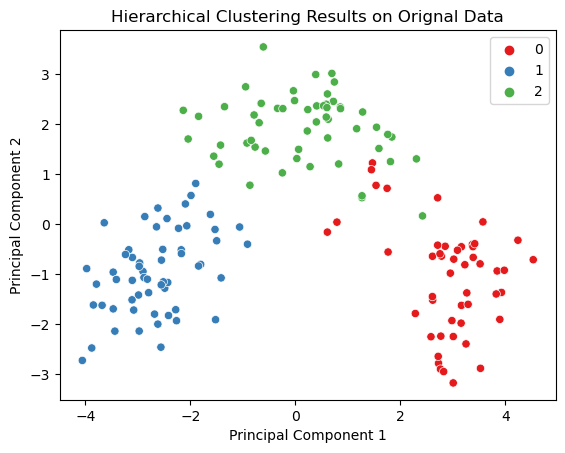

In [56]:
# Visualize clusters
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_hierarchical, palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering Results on Orignal Data')
plt.show()

hierarchical cluster gives us well sepreded the cluseter but we can see some overlapping of cluster 

# Task 4: Clustering with PCA Data:

### K-means on PCA Data

In [25]:
kmeans_pca = KMeans(n_clusters=3) 
labels_pca = kmeans_pca.fit_predict(df_pca)


In [26]:
# Evaluate clustering performance
sil_score_pca = silhouette_score(df_pca, labels_pca)
db_score_pca = davies_bouldin_score(df_pca, labels_pca)

print(f'Silhouette Score (PCA): {sil_score_pca}')
print(f'Davies-Bouldin Score (PCA): {db_score_pca}')


Silhouette Score (PCA): 0.3902391241259721
Davies-Bouldin Score (PCA): 1.0224487190405867


we can see that the accuracy of model is increase when we have used the PCA dataset 

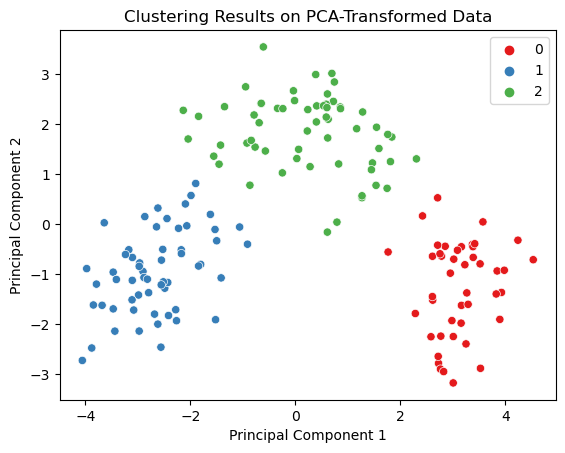

In [27]:
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_pca, palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results on PCA-Transformed Data')
plt.show()

**We can see that k-means on pca data has performed well and seprated the cluster very aacurately**

### Hierarchical on PCA data

In [57]:
linked = linkage(df_pca, method='ward')

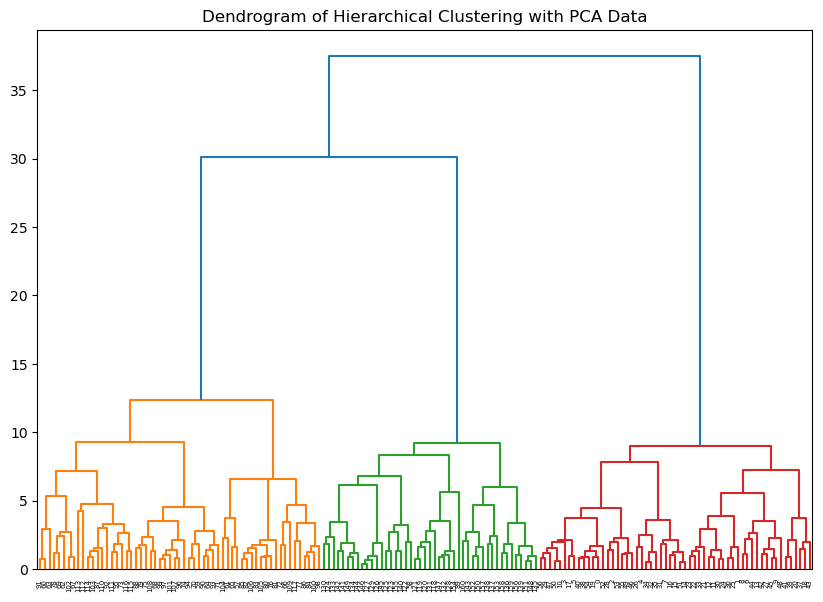

In [58]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram of Hierarchical Clustering with PCA Data')
plt.show()


dentrogram shows that there are three well sepreated cluster 

In [60]:
# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels_agg_pca = agg_cluster.fit_predict(df_pca)

In [62]:
# Evaluate clustering performance
sil_score_agg_pca = silhouette_score(df_pca, labels_agg)
db_score_agg_pca = davies_bouldin_score(df_pca, labels_agg)

print(f'Silhouette Score (Agglomerative_PCA): {sil_score_agg_pca}')
print(f'Davies-Bouldin Score (Agglomerative_PCA): {db_score_agg_pca}')

Silhouette Score (Agglomerative_PCA): 0.3852860926547475
Davies-Bouldin Score (Agglomerative_PCA): 1.0328819344951083


The score is low than the k-means on the PCA data it show tha the k-means may be good on this data 

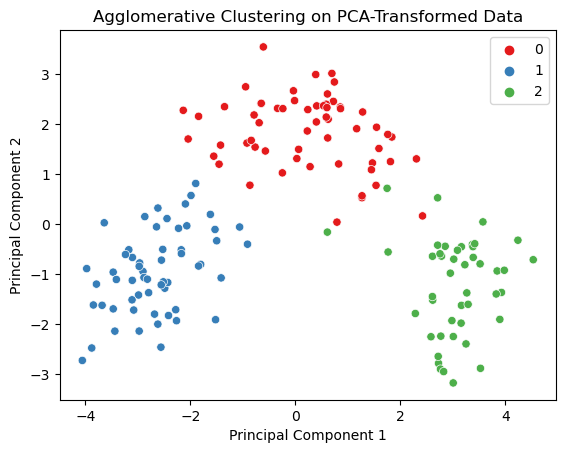

In [63]:
# Scatter plot for Agglomerative clustering
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels_agg, palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering on PCA-Transformed Data')
plt.show()

Hierachical clustering on PCA data reduced some overlapping and outliers problem and gives us the well seprated three cluseter 

# Task 5: Comparison and Analysis:

In [66]:
result = {
    'Dataset': ['K-means (Original_data)', 'Hierarchical(orignal_data)', 'k-means(PCA_data)', 'Hierarchical(pCA_data)'],
    'Silhouette Score': [sil_score,sil_score_hierarchical,sil_score_pca,sil_score_agg_pca],
    'Davies-Bouldin Score': [db_score,db_score_hierarchical,db_score_pca,db_score_agg_pca]
}

results_df = pd.DataFrame(result)
print(results_df)

                      Dataset  Silhouette Score  Davies-Bouldin Score
0     K-means (Original_data)          0.322849              1.239771
1  Hierarchical(orignal_data)          0.313695              1.266602
2           k-means(PCA_data)          0.390239              1.022449
3      Hierarchical(pCA_data)          0.385286              1.032882


### Clustering Results Summary 

- **Original Dataset (K-Means)**:
  - **Silhouette Score**: 0.3228
  - **Davies-Bouldin Index**: 1.2398
  - **Cluster Quality**: Moderate overlap; less distinct separation.

- **Original Dataset (Hierarchical Clustering)**:
  - **Silhouette Score**: 0.3137
  - **Davies-Bouldin Index**: 1.2666
  - **Cluster Quality**: Slightly more overlap than K-Means.

- **PCA-Transformed Dataset (K-Means)**:
  - **Silhouette Score**: 0.3902
  - **Davies-Bouldin Index**: 1.0224
  - **Cluster Quality**: More distinct and separated clusters.

- **PCA-Transformed Dataset (Hierarchical Clustering)**:
  - **Silhouette Score**: 0.3853
  - **Davies-Bouldin Index**: 1.0329
  - **Cluster Quality**: Similar to K-Means with clear separation.

##### Key Insights:

- **Improved Clustering with PCA**:
  - PCA-enhanced clustering shows **better separation** with higher **Silhouette Scores** and lower **Davies-Bouldin Index**.
  - **K-Means and Hierarchical** on PCA data outperform their counterparts on the original data.
  
- **PCA Benefits**:
  - **Noise reduction** and focus on important features.
  - Easier **visualization** and **interpretation**.

- **Trade-offs**:
  - **PCA Advantages**: Better-defined clusters, less overlap, and improved performance.
  - **PCA Disadvantages**: Slight risk of information loss.
  - **Original Dataset**: No feature reduction, but noisier and less distinct clustering.


# Task 6: Conclusion and Insights

#### Key Findings
- **Clustering Performance**:
  - PCA improved clustering results.
  - **Silhouette Score** increased from 0.3228 (original) to 0.3902 (PCA for K-Means).
  - **Davies-Bouldin Index** reduced from 1.2398 to 1.0224, resulting in more distinct clusters.
  
- **Visualization**: 
  - PCA made it easier to visualize high-dimensional data, enhancing the interpretability of clustering results.

#### Practical Implications
- **Enhanced Clustering**:
  - PCA focuses on significant features and reduces noise, leading to improved clustering quality.
  
- **Efficiency**:
  - Dimensionality reduction decreases computational complexity, making clustering algorithms more efficient.

#### Recommendations
- **Use PCA**:
  - Especially useful for high-dimensional data where some features are irrelevant or noisy, and when visualization is important.

- **Cluster on Original Data**:
  - When the dataset has a manageable number of dimensions, and all features are important for analysis.

#### Summary
- **PCA** can significantly enhance both performance and interpretability in clustering tasks.
- **Trade-offs**:
  - Weigh the potential for information loss against the benefits of improved clustering quality, particularly in high-dimensional datasets.
